In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from IPython.display import clear_output
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from glob import glob


we are now loading our images data into a variable here which we will use for our training

In [2]:
train_dir = 'Train/'
test_dir =  'Test/'
behaviours = []
behaviour_image = []
for i in os.listdir(train_dir):
    for image_filename in os.listdir(train_dir + i):
        behaviours.append(i) # name of the fruit 
        behaviour_image.append(i + '/' + image_filename) # image of the fruit
train_anomalies = pd.DataFrame(behaviours, columns=["typeofbehavior"])
train_anomalies["behavior  Image"] = behaviour_image

In [3]:
train_anomalies

,typeofbehavior,behavior Image
0,Abuse,Abuse/Abuse001_x264_0.png
1,Abuse,Abuse/Abuse001_x264_10.png
2,Abuse,Abuse/Abuse001_x264_100.png
3,Abuse,Abuse/Abuse001_x264_1000.png
4,Abuse,Abuse/Abuse001_x264_1010.png
...,...,...
1266340,Vandalism,Vandalism/Vandalism050_x264_860.png
1266341,Vandalism,Vandalism/Vandalism050_x264_870.png
1266342,Vandalism,Vandalism/Vandalism050_x264_880.png
1266343,Vandalism,Vandalism/Vandalism050_x264_890.png


 Let's take a look at the  most common behaviors  among these datasets.

In [4]:
from collections import Counter
newData = Counter(train_anomalies["typeofbehavior"])
most_behaviours = newData.most_common(15)
print("The 15 most frequently found behaviours in the data set and their number")
most_behaviours

The 15 most frequently found behaviours in the data set and their number


[('NormalVideos', 947768),
 ('Stealing', 44802),
 ('Robbery', 41493),
 ('Burglary', 39504),
 ('Arrest', 26397),
 ('Shoplifting', 24835),
 ('Fighting', 24684),
 ('Arson', 24421),
 ('RoadAccidents', 23486),
 ('Abuse', 19076),
 ('Explosion', 18753),
 ('Vandalism', 13626),
 ('Assault', 10360),
 ('Shooting', 7140)]

In [5]:
x,y = zip(*most_behaviours)
xs=x
x,y = list(x),list(y)

In [6]:
print("The 15 most frequently found behaviours in the dataset -- > \n ", x)

The 15 most frequently found behaviours in the dataset -- > 
  ['NormalVideos', 'Stealing', 'Robbery', 'Burglary', 'Arrest', 'Shoplifting', 'Fighting', 'Arson', 'RoadAccidents', 'Abuse', 'Explosion', 'Vandalism', 'Assault', 'Shooting']


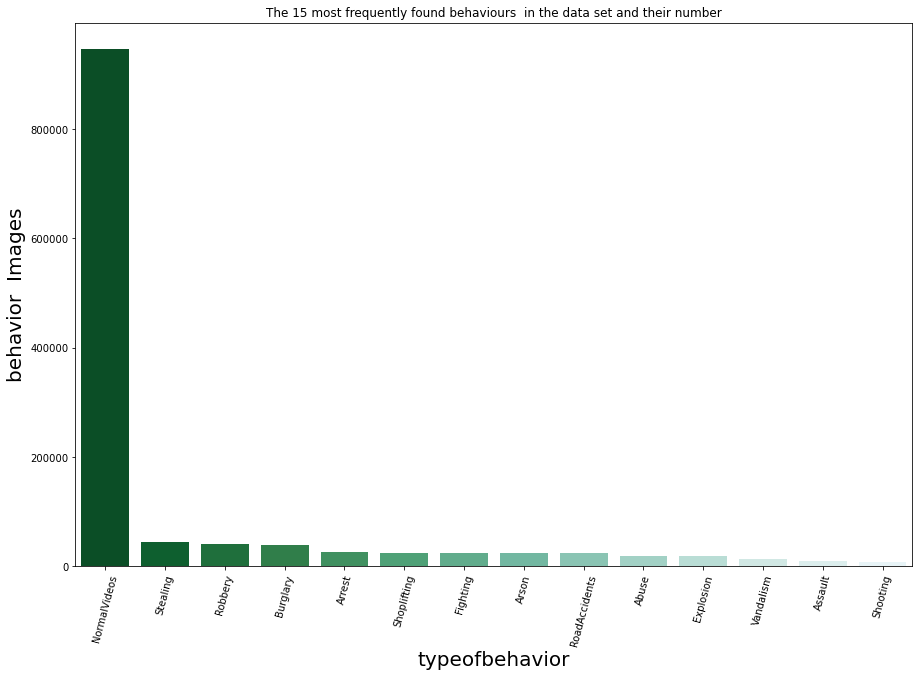

In [7]:
plt.figure(figsize=(15,10))
ax= sns.barplot(x=x, y=y, palette=sns.color_palette("BuGn_r", 15)) 
plt.xlabel('typeofbehavior', size = 20) 
plt.ylabel('behavior  Images', size = 20 )
plt.xticks(rotation = 75)
plt.title('The 15 most frequently found behaviours  in the data set and their number') 
plt.show()

 Images of the type of behaviours available

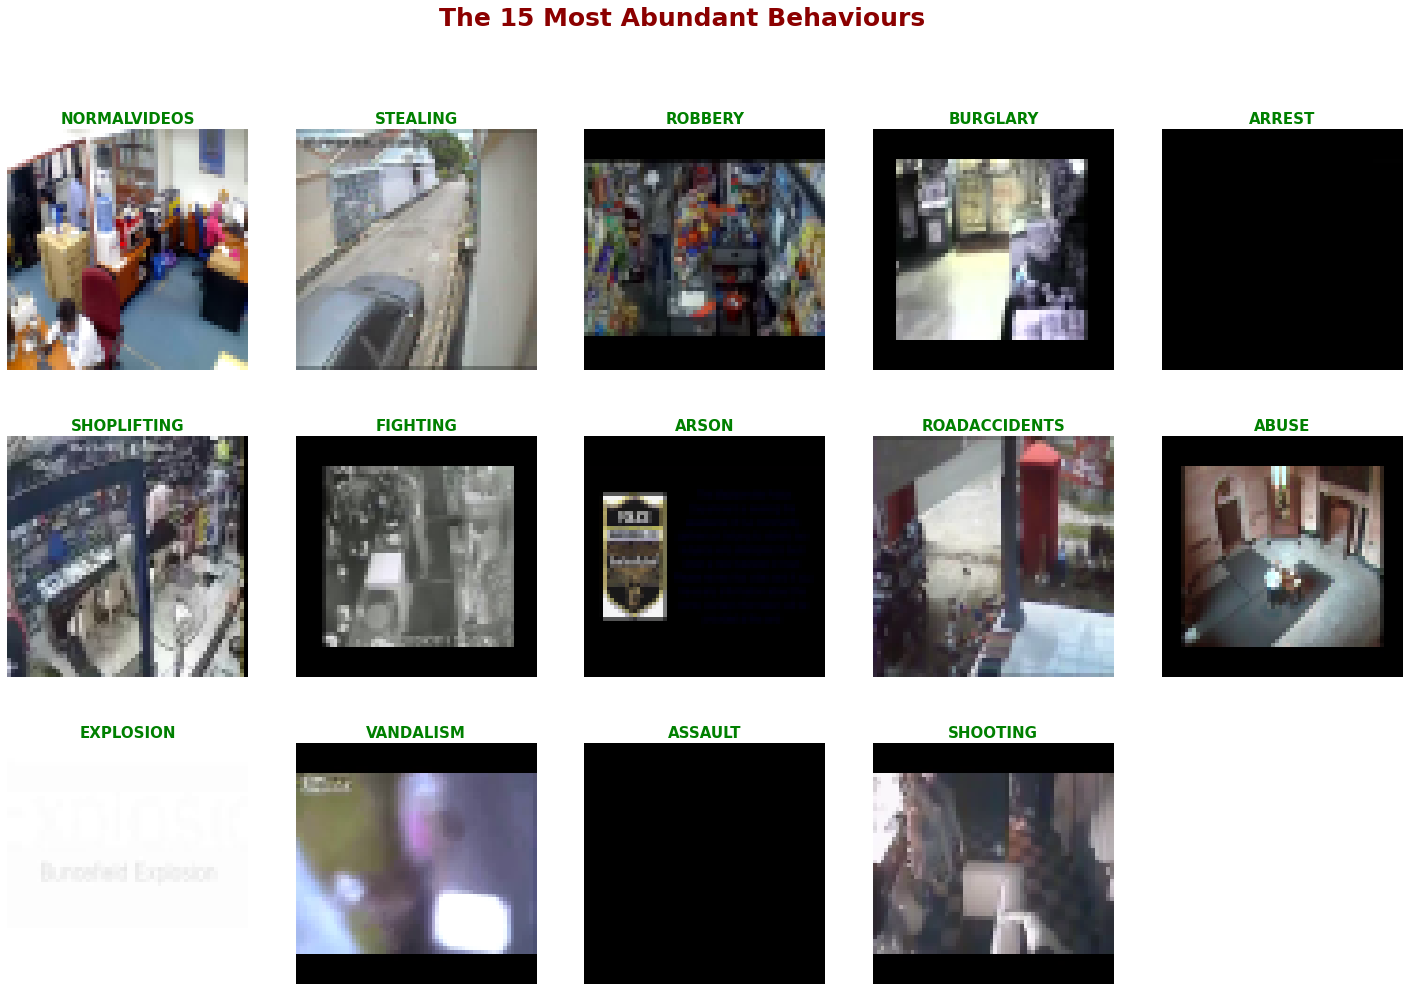

In [8]:
plt.figure(figsize=(25,16))
how_many_fruits = len(x)
def percentage():
    for cd in xs:
        ind=0
        if imagepath.find(cd)!=-1:
            cl=cd
            return cl
            break
        else:
            cd=0
        
        ind=ind+1
for i in range(how_many_fruits):
    behv = train_anomalies[train_anomalies["typeofbehavior"] == x[i]]["behavior  Image"].values [1]
    
    plt.subplot(3,5,i+1)
    img = load_img(train_dir + behv)
    plt.imshow(img)
    plt.title(x[i].upper(), color = "green", fontsize = 15 , fontweight = 600)
    plt.axis("off")

plt.suptitle("The 15 Most Abundant Behaviours", fontsize = 25 , color = "darkred", fontweight = 'bold')
plt.show()

Checking shape of the images we have  and this will act as input in our model 

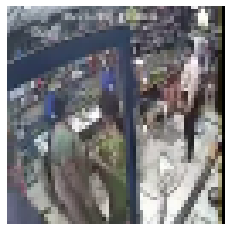

In [9]:
img = load_img(train_dir + "Shoplifting/Shoplifting003_x264_230.png")
plt.imshow(img)
plt.axis("off")
plt.show()

In [10]:
array_image = img_to_array(img)
print("Image Shape --> ", array_image.shape)

Image Shape -->  (64, 64, 3)


In [11]:
fruitCountUnique = glob(train_dir + '/*' )
numberOfClass = len(fruitCountUnique)
print("How many different behaviours  are there  -->  ",numberOfClass)

How many different behaviours  are there  -->   14


  Creating a  Model now in CNN



In [12]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = array_image.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("softmax"))

# Compile Model

In [13]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [14]:
epochs = 100  
batch_size = 32

In [15]:

print("Target Size --> ", array_image.shape[:2])

Target Size -->  (64, 64)


In [16]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                   shear_range = 0.3,
                   horizontal_flip=True,
                   zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale= 1./255)

In [17]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size= array_image.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 1266345 images belonging to 14 classes.


In [18]:
test_generator = test_datagen.flow_from_directory(
        test_dir, 
        target_size= array_image.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 111308 images belonging to 14 classes.


In [19]:
for data_batch, labels_batch in train_generator:
    print("data_batch shape --> ",data_batch.shape)
    print("labels_batch shape --> ",labels_batch.shape)
    break

data_batch shape -->  (32, 64, 64, 3)
labels_batch shape -->  (32, 14)


# Fit the model

In [20]:
hist = model.fit_generator(
        generator = train_generator,
        steps_per_epoch = 1600 // batch_size,
        epochs=epochs,
        validation_data = test_generator,
        validation_steps = 800 // batch_size)

Epoch 1/100
50/50 [==============================] - 13s 245ms/step - loss: 1.2828 - accuracy: 0.7444 - val_loss: 1.6652 - val_accuracy: 0.6137
Epoch 2/100
50/50 [==============================] - 21s 425ms/step - loss: 1.2004 - accuracy: 0.7506 - val_loss: 2.0864 - val_accuracy: 0.5750
Epoch 3/100
50/50 [==============================] - 16s 327ms/step - loss: 1.2010 - accuracy: 0.7450 - val_loss: 1.8874 - val_accuracy: 0.5750
Epoch 4/100
50/50 [==============================] - 16s 316ms/step - loss: 1.1176 - accuracy: 0.7606 - val_loss: 1.7710 - val_accuracy: 0.6012
Epoch 5/100
50/50 [==============================] - 16s 309ms/step - loss: 1.1831 - accuracy: 0.7319 - val_loss: 1.8280 - val_accuracy: 0.5900
Epoch 6/100
50/50 [==============================] - 17s 331ms/step - loss: 1.1419 - accuracy: 0.7469 - val_loss: 2.2263 - val_accuracy: 0.5437
Epoch 7/100
50/50 [==============================] - 16s 320ms/step - loss: 1.0827 - accuracy: 0.7475 - val_loss: 2.2720 - val_accuracy:

50/50 [==============================] - 10s 188ms/step - loss: 0.7508 - accuracy: 0.8050 - val_loss: 2.6180 - val_accuracy: 0.5600
Epoch 58/100
50/50 [==============================] - 9s 188ms/step - loss: 0.7371 - accuracy: 0.8087 - val_loss: 2.3153 - val_accuracy: 0.5612
Epoch 59/100
50/50 [==============================] - 10s 192ms/step - loss: 0.7664 - accuracy: 0.8075 - val_loss: 2.6222 - val_accuracy: 0.5512
Epoch 60/100
50/50 [==============================] - 10s 190ms/step - loss: 0.7367 - accuracy: 0.8094 - val_loss: 2.4533 - val_accuracy: 0.5638
Epoch 61/100
50/50 [==============================] - 9s 186ms/step - loss: 0.7520 - accuracy: 0.8100 - val_loss: 2.2672 - val_accuracy: 0.5675
Epoch 62/100
50/50 [==============================] - 10s 202ms/step - loss: 0.7456 - accuracy: 0.8050 - val_loss: 2.3146 - val_accuracy: 0.5775
Epoch 63/100
50/50 [==============================] - 9s 185ms/step - loss: 0.7074 - accuracy: 0.8106 - val_loss: 3.5017 - val_accuracy: 0.5775
E

In [21]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
print('Accuracy of the model is ',sum(hist.history['accuracy'])/len(hist.history['accuracy'])*100)

Accuracy of the model is  79.42687517404556


# Loss Chart

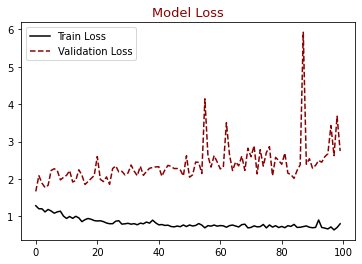

In [23]:
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "darkred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

#  Accuracy Chart

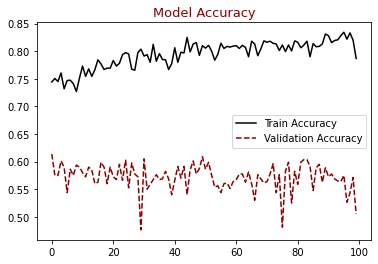

In [24]:
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "darkred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

Test/Burglary/Burglary005_x264_130.png


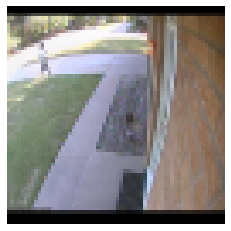

In [30]:
imagepath=test_dir + "Burglary/Burglary005_x264_130.png"
print(imagepath)
img = load_img(imagepath)
plt.imshow(img)
img1 = np.array(img)
cdd=percentage()
img_array = tf.expand_dims(img1, 0)
plt.axis("off")
plt.show()

In [31]:
pred=model.predict(img_array)
#printing the first element from predicted data

#print(pred[0])
#printing the index of 
print('The added image  belongs category of  ',(cdd or x[np.argmax(pred[0])]))

The added image  belongs category of   Burglary


Frame0.png


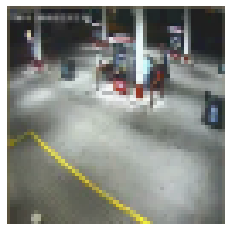

The added image  belongs to Burglary


Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\gradio\routes.py", line 280, in predict
    output = await app.blocks.process_api(body, username, session_state)
  File "C:\ProgramData\Anaconda3\lib\site-packages\gradio\blocks.py", line 277, in process_api
    predictions = await run_in_threadpool(block_fn.fn, *processed_input)
  File "C:\ProgramData\Anaconda3\lib\site-packages\starlette\concurrency.py", line 41, in run_in_threadpool
    return await anyio.to_thread.run_sync(func, *args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\anyio\to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "C:\ProgramData\Anaconda3\lib\site-packages\anyio\_backends\_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "C:\ProgramData\Anaconda3\lib\site-packages\anyio\_backends\_asyncio.py", line 867, in run
    result = context.run(func, *args)
  File "C:\ProgramData\Anaconda3\lib\s

In [33]:
import cv2
cap = cv2.VideoCapture(0)
i = 0

while(cap.isOpened()):
    ret, frame = cap.read()

    # This condition prevents from infinite looping
    # incase video ends.
    if ret == False:
        break

    # Save Frame by Frame into disk using imwrite method
    cv2.imwrite('Frame'+str(i)+'.png', frame)
    imagename='Frame'+str(i)+'.png'
    print(imagename)
    i += 1  
    imagepath= test_dir + "Explosion/Explosion002_x264_920.png"
    #print(imagepath)
    img = load_img(imagepath)
    plt.imshow(img)
    img1 = np.array(img)
    #cdd=percentage()
    img_array = tf.expand_dims(img1, 0,64)
    plt.axis("off")
    plt.show()
    pred=model.predict(img_array)
    result='The added image  belongs to '+(cdd or x[np.argmax(pred[0])])
    print(result)
    cap.release()
    cv2.destroyAllWindows()
    break

In [28]:
from gtts import gTTS
import gradio as gr
import os
import matplotlib.pyplot as plt


    
def UI(file_obj,result):
 
   
    return result




iface = gr.Interface(fn = UI, 
                     inputs = 'image', 
                     outputs = 'text', 
                     title = 'Image Classification to detect behavioural annomalies',
                     article = 
                        '''<div>
                            <p> All you need to do is to click submit and observe classification</p>
                        </div>'''
                    )
iface.launch(auth=('admin','chido'),share=True)


Running on local URL:  http://127.0.0.1:7860/
Running on public URL: https://11629.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://www.huggingface.co/spaces)


(<gradio.routes.App at 0x2a810721bb0>,
 'http://127.0.0.1:7860/',
 'https://11629.gradio.app')

We are passing the image we are to pass to test the code model

In [29]:
check app

SyntaxError: invalid syntax (Temp/ipykernel_96832/4161789303.py, line 1)